In [40]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
folder_path = 'Train_vibrations/'
df_list = []

In [25]:
# Loop through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path, delimiter=',', header=None)
        df_list.append(df)

In [26]:
# Concatenate all dataframes in the list
concatenated_df = pd.concat(df_list, ignore_index=True)

In [28]:
# Name columns
concatenated_df.columns = ['datetime', 'temperature', 'humidity', 'x', 'y', 'z']
concatenated_df

,datetime,temperature,humidity,x,y,z
0,2021-07-30 09:19:49,67.0,15.0,-0.192,0.988,-0.068
1,2021-07-30 09:19:50,67.0,15.0,-0.188,0.984,-0.064
2,2021-07-30 09:19:52,67.0,15.0,-0.184,0.992,-0.064
3,2021-07-30 09:19:53,67.0,15.0,-0.192,0.984,-0.072
4,2021-07-30 09:19:54,66.0,15.0,-0.192,0.992,-0.068
...,...,...,...,...,...,...
158508,2021-07-24 09:18:13,54.0,14.0,-0.196,0.988,-0.060
158509,2021-07-24 09:18:16,54.0,14.0,-0.192,0.984,-0.068
158510,2021-07-24 09:18:17,54.0,14.0,-0.180,0.980,-0.060
158511,2021-07-24 09:18:18,54.0,14.0,-0.188,0.988,-0.060


In [35]:
# Convert the datetime column to the datetime type
concatenated_df['datetime'] = pd.to_datetime(concatenated_df['datetime'], errors='coerce')

In [36]:
# Drop where the datetime column is NAT
concatenated_df = concatenated_df.dropna(subset=['datetime'])
concatenated_df

,datetime,temperature,humidity,x,y,z
0,2021-07-30 09:19:49,67.0,15.0,-0.192,0.988,-0.068
1,2021-07-30 09:19:50,67.0,15.0,-0.188,0.984,-0.064
2,2021-07-30 09:19:52,67.0,15.0,-0.184,0.992,-0.064
3,2021-07-30 09:19:53,67.0,15.0,-0.192,0.984,-0.072
4,2021-07-30 09:19:54,66.0,15.0,-0.192,0.992,-0.068
...,...,...,...,...,...,...
158508,2021-07-24 09:18:13,54.0,14.0,-0.196,0.988,-0.060
158509,2021-07-24 09:18:16,54.0,14.0,-0.192,0.984,-0.068
158510,2021-07-24 09:18:17,54.0,14.0,-0.180,0.980,-0.060
158511,2021-07-24 09:18:18,54.0,14.0,-0.188,0.988,-0.060


In [37]:
# Sort the dataframe by the 'datetime' column
sorted_df = concatenated_df.sort_values(by='datetime')

# Save the sorted dataframe to a new CSV file
sorted_df.to_csv('train_vibrations.csv', index=False)

In [38]:
sorted_df

,datetime,temperature,humidity,x,y,z
77022,2021-07-21 15:39:01,60.0,14.0,-0.196,0.988,-0.064
77023,2021-07-21 15:39:02,61.0,14.0,-0.184,0.980,-0.060
77024,2021-07-21 15:39:06,61.0,14.0,-0.200,0.984,-0.064
77025,2021-07-21 15:39:07,60.0,14.0,-0.184,0.988,-0.060
77026,2021-07-21 15:39:08,60.0,14.0,-0.196,0.980,-0.060
...,...,...,...,...,...,...
22010,2021-07-31 03:19:52,69.0,14.0,-0.188,0.992,-0.060
22011,2021-07-31 03:19:54,70.0,14.0,-0.188,0.984,-0.064
22012,2021-07-31 03:19:58,70.0,14.0,-0.188,0.984,-0.064
22013,2021-07-31 03:19:59,69.0,14.0,-0.192,0.992,-0.072


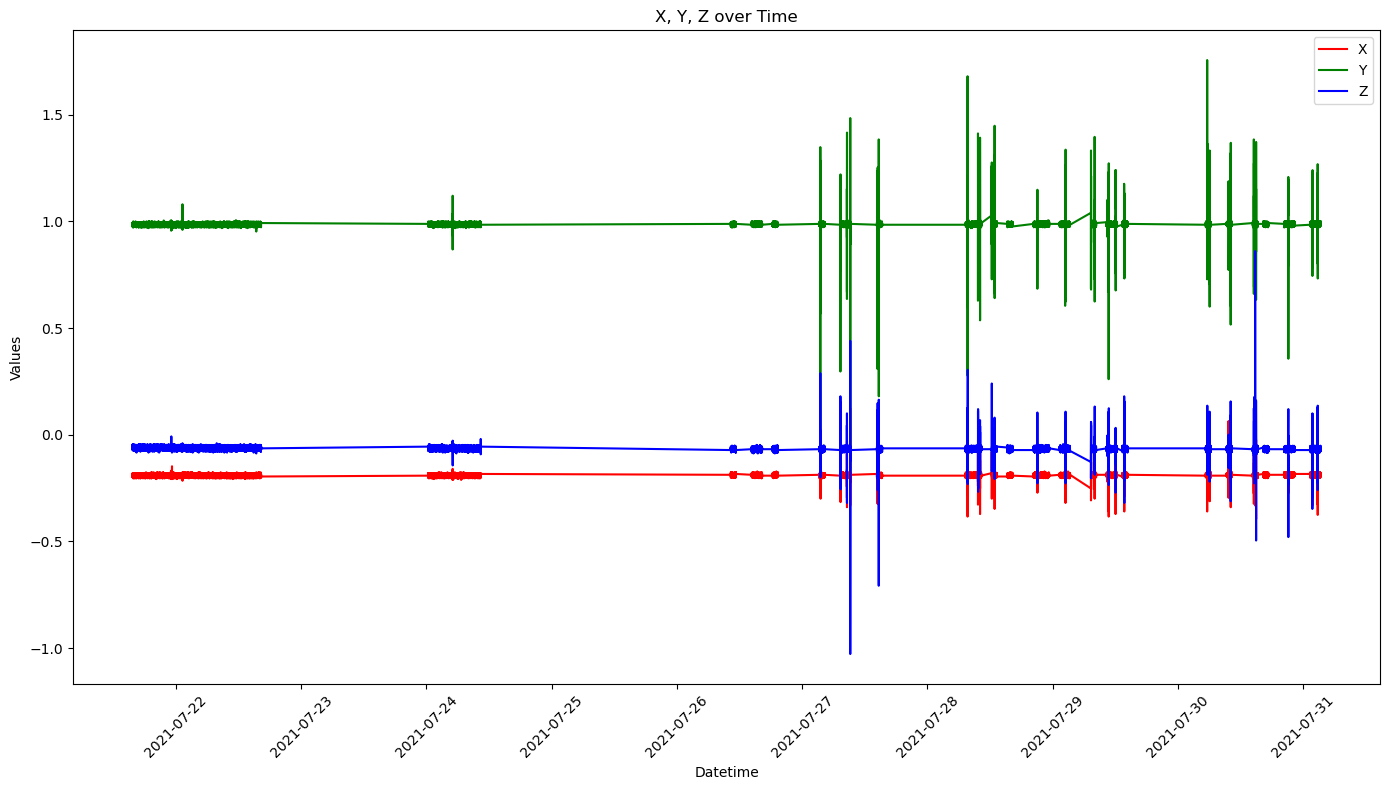

In [41]:
#PLotting the xyz vibrations
plt.figure(figsize=(14, 8))

plt.plot(sorted_df['datetime'], sorted_df['x'], label='X', color='r')
plt.plot(sorted_df['datetime'], sorted_df['y'], label='Y', color='g')
plt.plot(sorted_df['datetime'], sorted_df['z'], label='Z', color='b')

# Adding labels and title
plt.xlabel('Datetime')
plt.ylabel('Values')
plt.title('X, Y, Z over Time')

# Adding a legend
plt.legend()

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

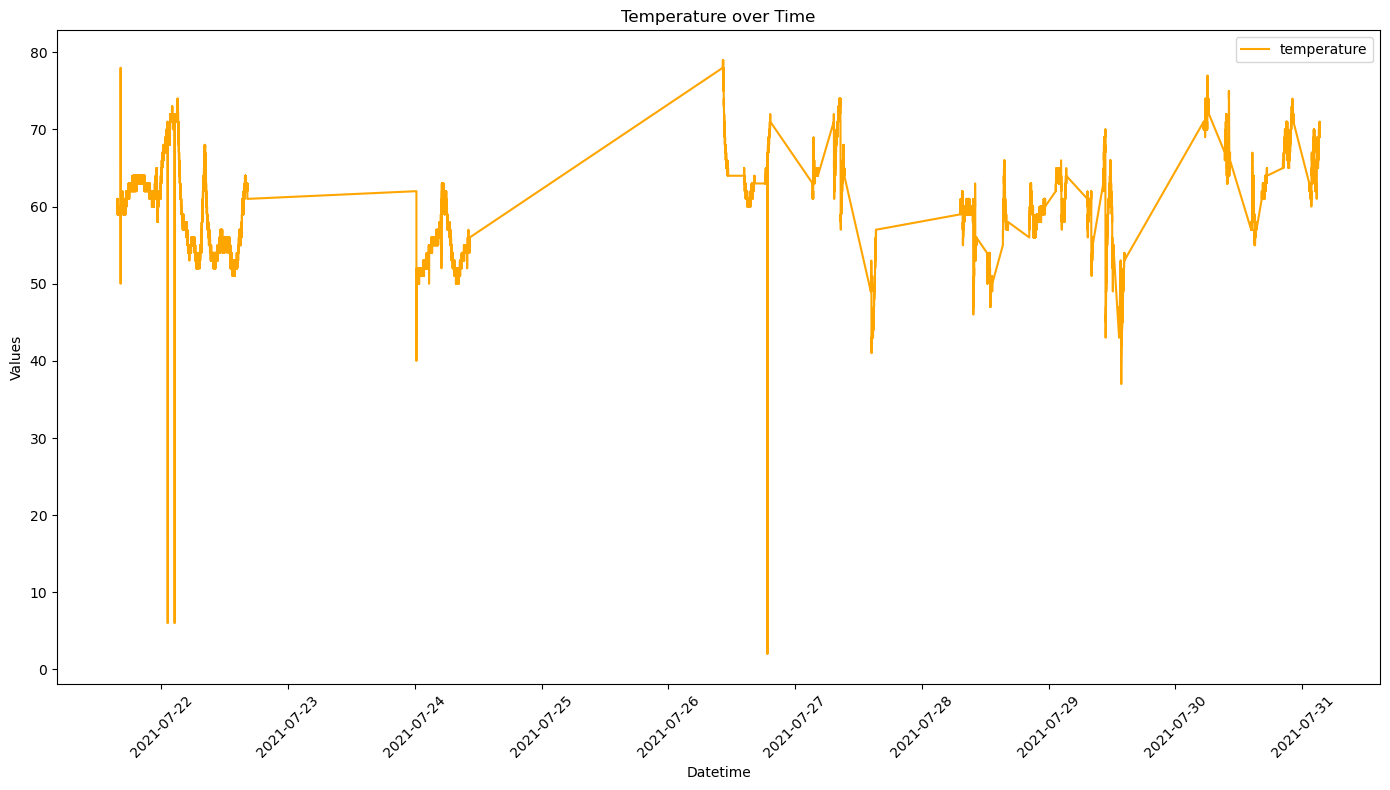

In [44]:
#PLotting the temperature and humidity readings
plt.figure(figsize=(14, 8))

plt.plot(sorted_df['datetime'], sorted_df['temperature'], label='temperature', color='orange')

# Adding labels and title
plt.xlabel('Datetime')
plt.ylabel('Values')
plt.title('Temperature over Time')

# Adding a legend
plt.legend()

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

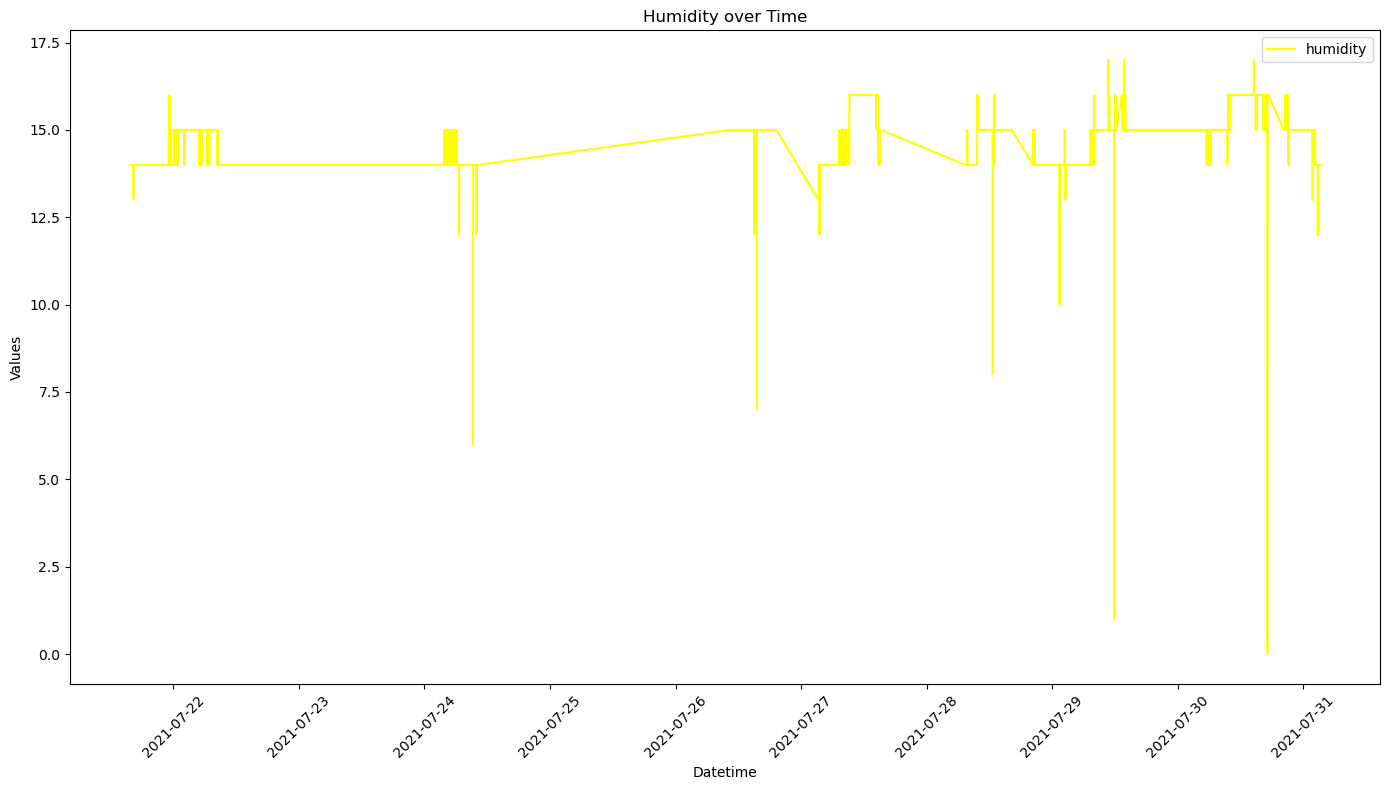

In [46]:
#PLotting the temperature and humidity readings
plt.figure(figsize=(14, 8))

plt.plot(sorted_df['datetime'], sorted_df['humidity'], label='humidity', color='yellow')

# Adding labels and title
plt.xlabel('Datetime')
plt.ylabel('Values')
plt.title('Humidity over Time')

# Adding a legend
plt.legend()

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()